## Implications of the Current Economic Cycle for CRE

### Professor Timothy H. Savage, Ph.D. CRE
* NYU Schack Institute of Real Estate
* Faculty Director | CREFC Center for Real Estate Finance at NYU Schack
* Distinguished Fellow | NAIOP Research Foundation
* Mentor | Real Estate Research Institute

### December 08, 2021

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## Economics and Finance in Two Graphs

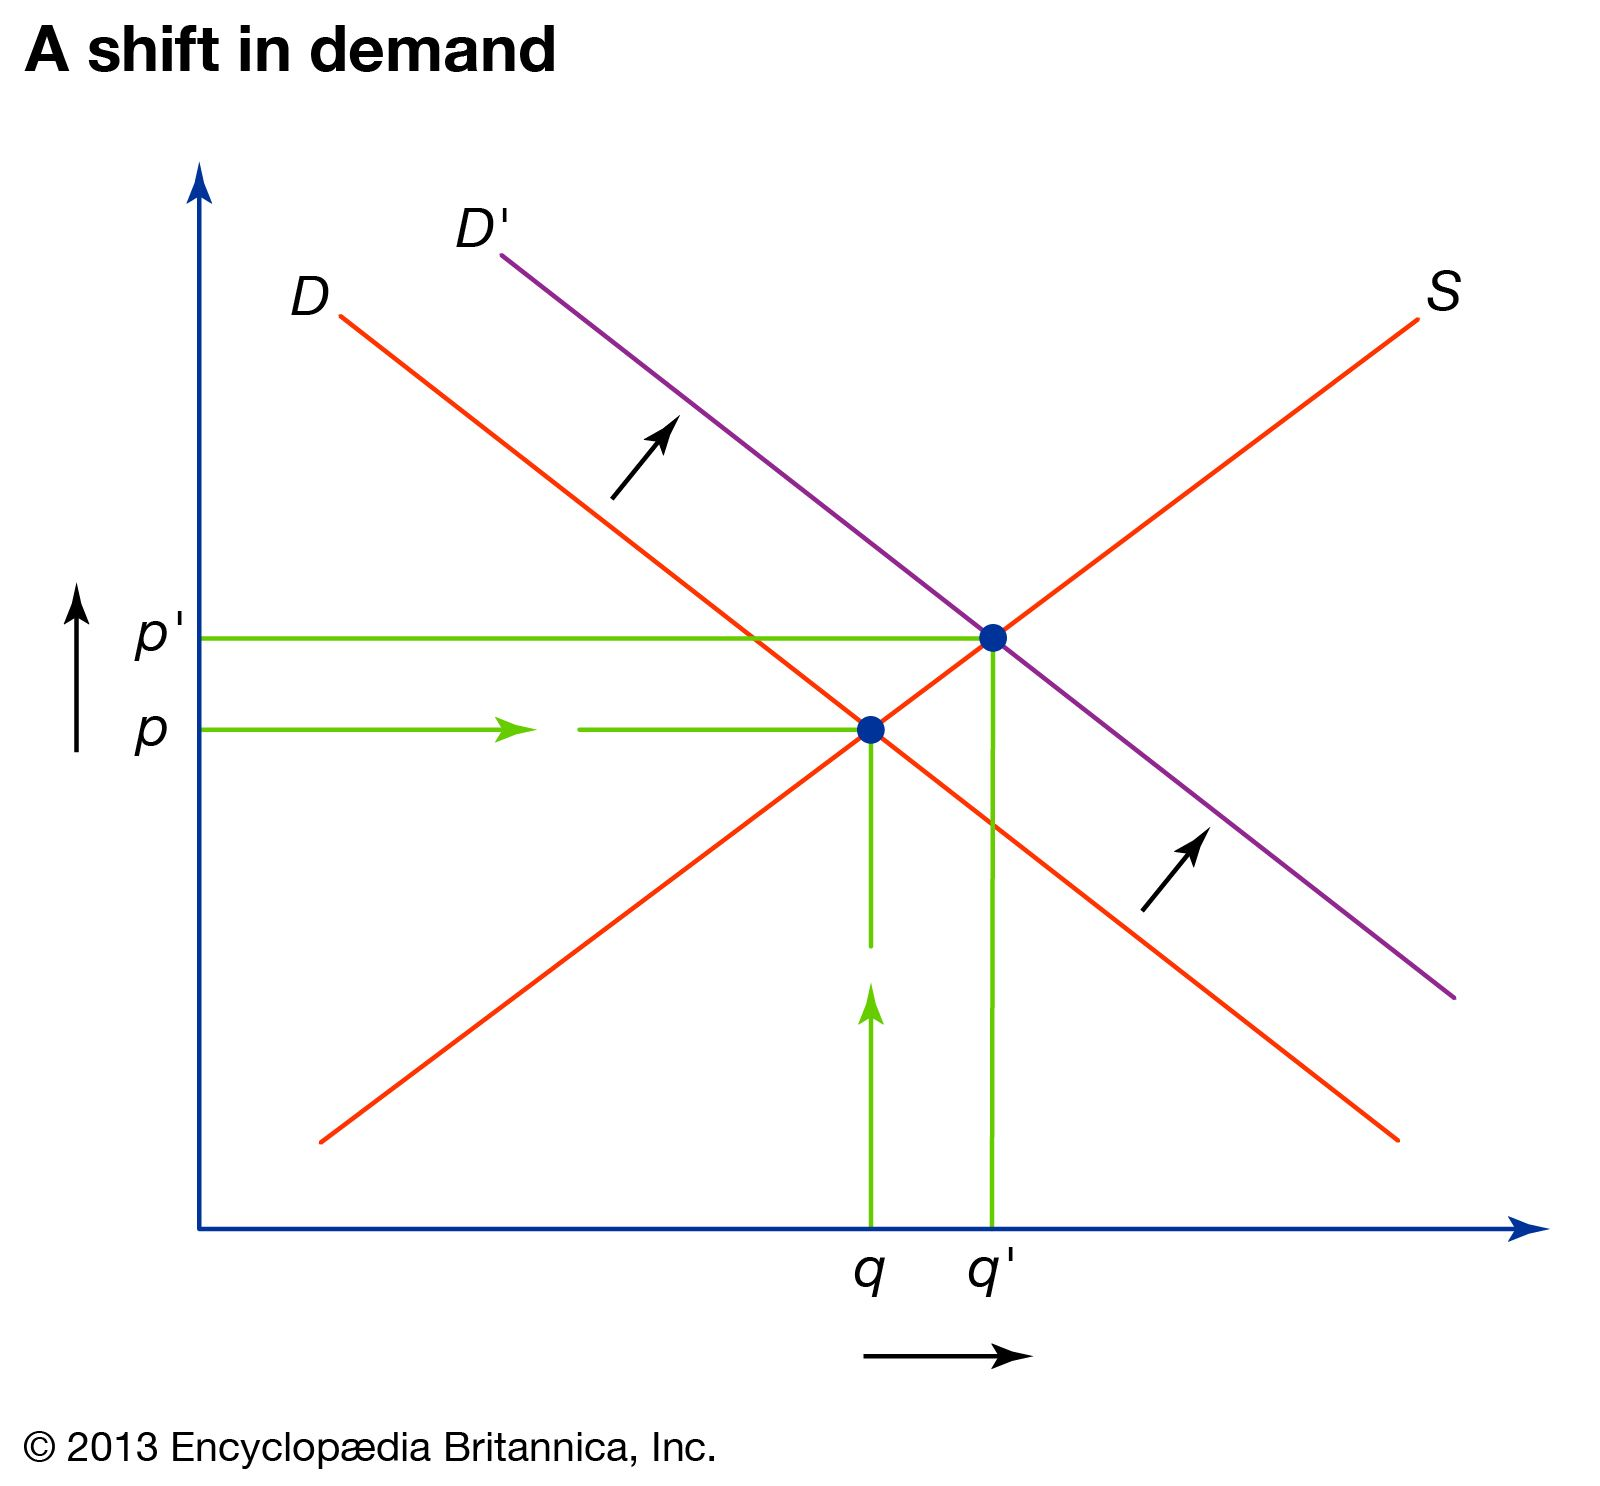

In [2]:
url = 'https://cdn.britannica.com/91/164691-050-73AA4674/Illustration-increase-equilibrium-price-quantity-shift-demand.jpg'
Image(url, width=600, height=600)

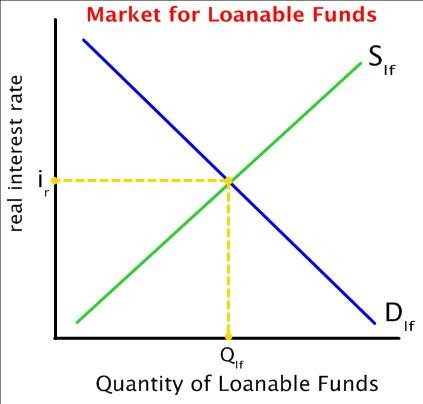

In [3]:
url = 'https://sbhshgovapmacro.files.wordpress.com/2011/04/loanable-funds-graph.jpg'
Image(url, width=600, height=600)

## The Prior U.S. Economic Cycle (2009 - 2019)
* [Hated by many](https://www.bloomberg.com/opinion/articles/2015-11-16/why-so-many-people-hate-this-economic-recovery).
* The fall of 2019 had two key **negative** economic signals.
    * A negative yield curve.
    * Fed intervention in overnight lending markets.
* I said to students at the time that U.S. economy would likely go into recession within 18 months.
* So did Duke Professor Campbell Harvey, who did the research to show the predictive power of a negative yield curve.

## June 2020
* Q2 2020 GDP contraction much larger than global financial crisis or the Fed-induced recession of the early 1980's.



* 10-year U.S. Treasury had fallen to ~50 bps.



* NBER formally declares the U.S. to be in a recession. 

## The Current Economic Cycle (2021 - ?)
* Let's learn to start love it graphically.
* Data as of yesterday.

In [4]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

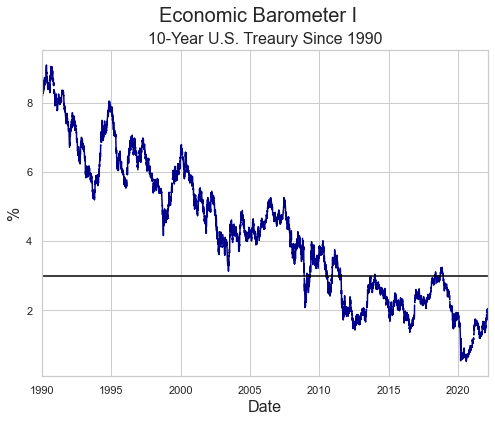

In [5]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer I', fontsize=20)
plt.title('10-Year U.S. Treaury Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")


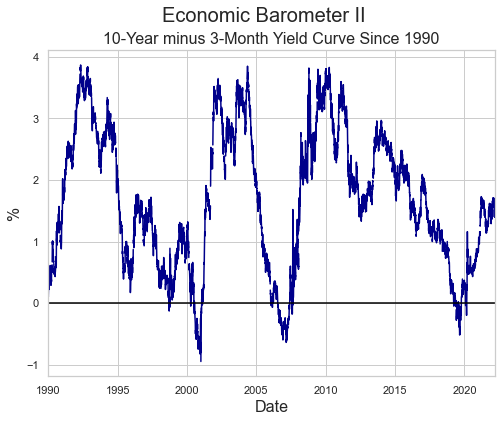

In [6]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer II', fontsize=20)
plt.title('10-Year minus 3-Month Yield Curve Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

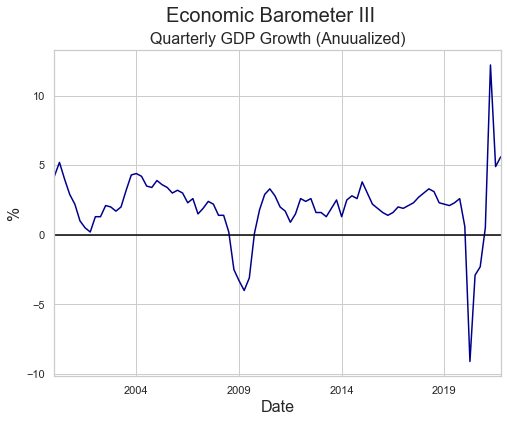

In [7]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer III', fontsize=20)
plt.title('Quarterly GDP Growth (Anuualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, 'Trillions $')

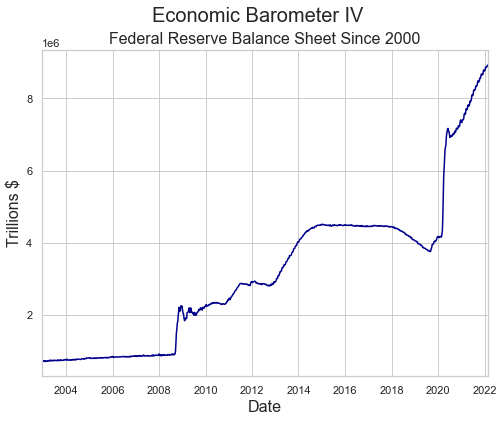

In [8]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer IV', fontsize=20)
plt.title('Federal Reserve Balance Sheet Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions $', fontsize=16)


Text(0, 0.5, '')

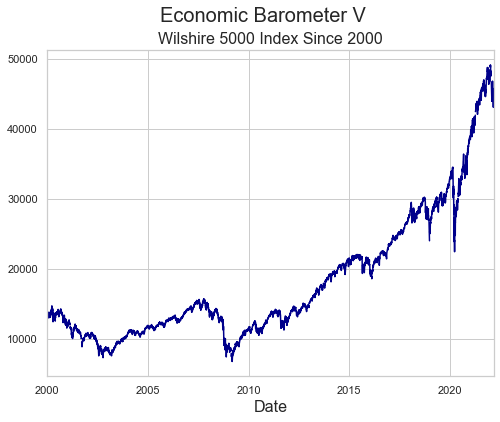

In [9]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer V', fontsize=20)
plt.title('Wilshire 5000 Index Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)


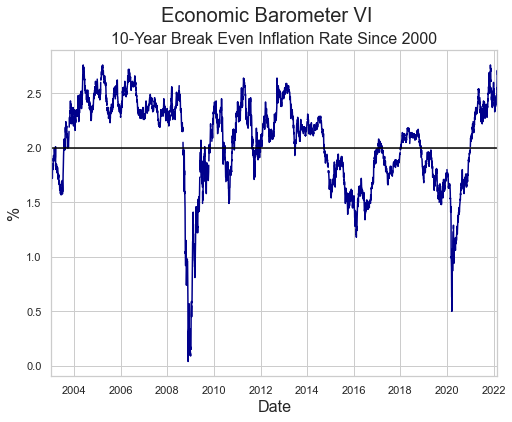

In [10]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer VI', fontsize=20)
plt.title('10-Year Break Even Inflation Rate Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

Text(0, 0.5, 'Millions ($)')

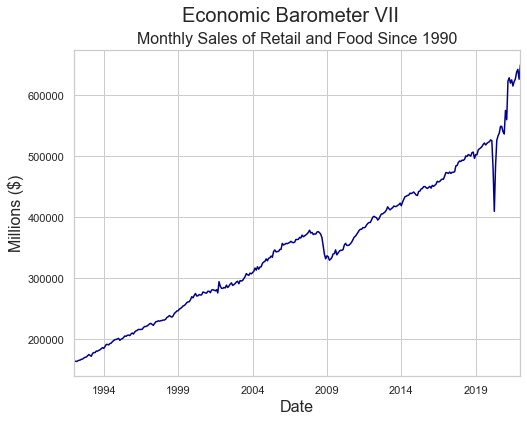

In [11]:
sales = fred.get_series("RSAFS", observation_start='1990-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer VII', fontsize=20)
plt.title('Monthly Sales of Retail and Food Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)


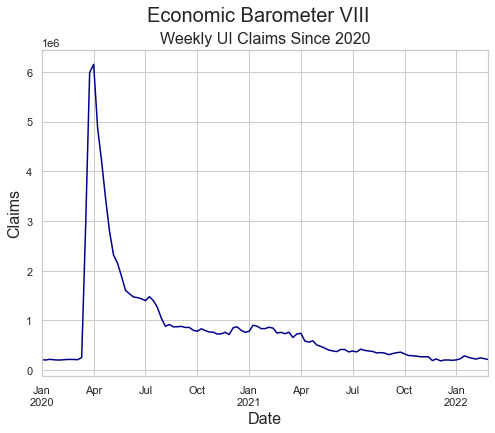

In [12]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer VIII', fontsize=20)
plt.title('Weekly UI Claims Since 2020', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

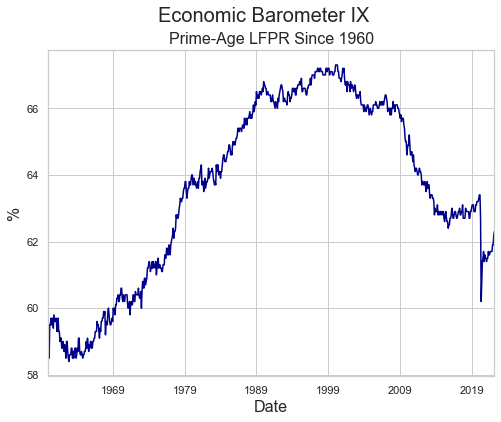

In [13]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer IX', fontsize=20)
plt.title('Prime-Age LFPR Since 1960', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)


Text(0, 0.5, 'Thousands')

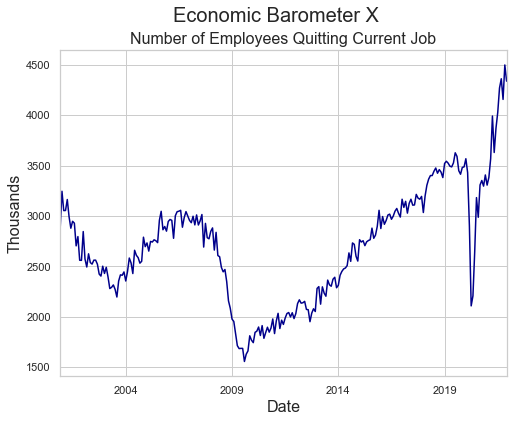

In [14]:
unemp_rate = fred.get_series("JTSQUL", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer X', fontsize=20)
plt.title('Number of Employees Quitting Current Job', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Thousands', fontsize=16)


Text(0, 0.5, '%')

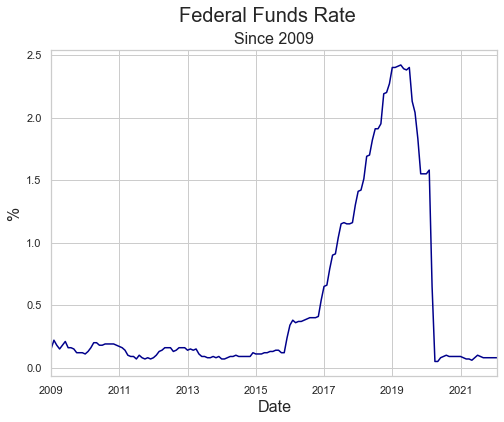

In [15]:
unemp_rate = fred.get_series("fedfunds", observation_start='2009-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Funds Rate', fontsize=20)
plt.title('Since 2009', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, '%')

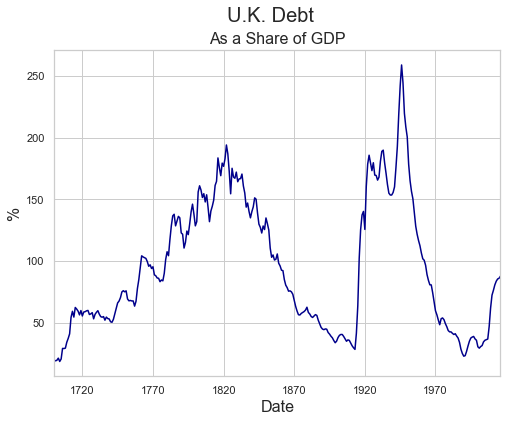

In [16]:
debt = fred.get_series("PSDOTUKA")
debt.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U.K. Debt', fontsize=20)
plt.title('As a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## Comparison with the Past?

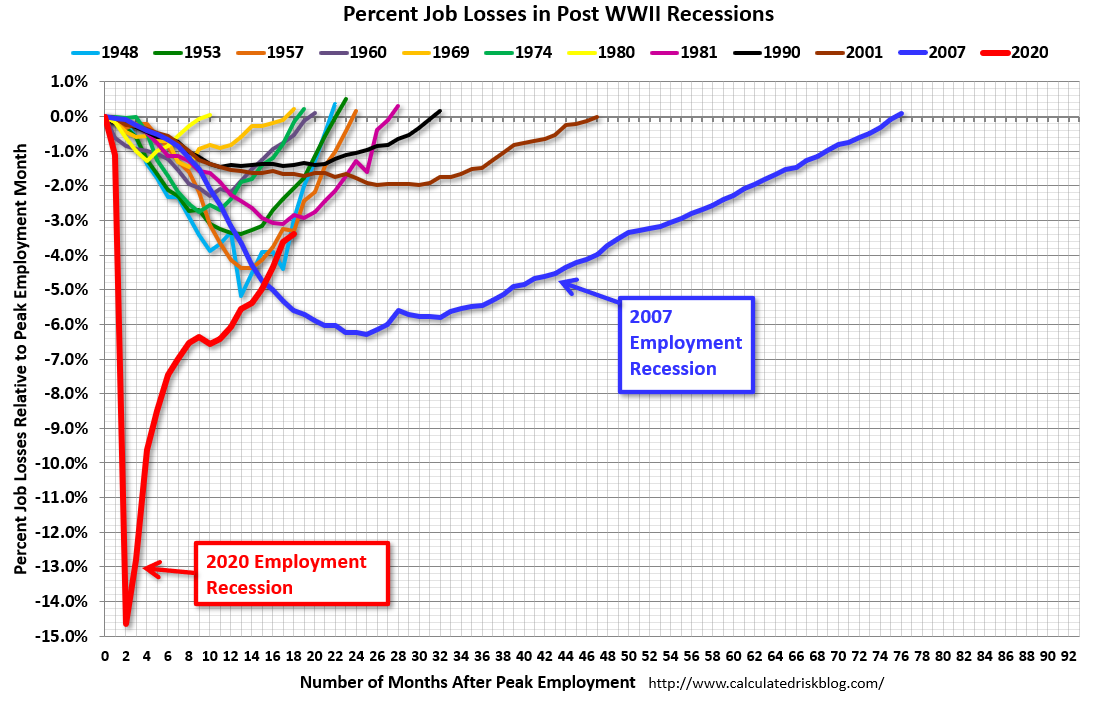

In [17]:
url = 'https://ritholtz.com/wp-content/uploads/2021/10/joblosses.png'
Image(url, width=800, height=800)

## Today's Sufficient Statistic of Macroeconomics
* [Source](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

In [18]:
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination.dropna()
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (210000000 - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (210000000 - vaccination['people_fully_vaccinated']) / 210000000 * 100
vaccination['rate'] = vaccination['daily_vaccinations'] / vaccination['people_outstanding'] * 100
vaccination['booster_count'] = vaccination['total_boosters'] - vaccination['total_boosters'].shift(periods=1, freq="D")
#vaccination.tail(100)

Text(0, 0.5, 'Tens of Millions')

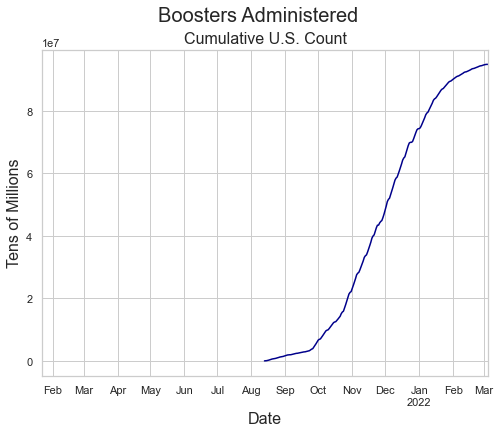

In [19]:
vaccination['total_boosters'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Boosters Administered', fontsize=20)
plt.title('Cumulative U.S. Count', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tens of Millions', fontsize=16)



## Implications for CRE
* CRE faced substantial disruptive forces pre-Covid.
    * E-commerce: I, R and MF.
    * Flex office space and real-time pricing: O.
    * The introduction of algorithms for capital deployment.
    * Local political opposition to development.
    * The return of rent regulation.
* Covid has accelerated the impact of these forces.

### Covid Remains the Largest Source of Uncertainty to CRE
* **Nationally**: implications of WFH ~50% of the time.
* **Locally**: implications for high-tax/high-amenity cities.

# Thank You

## Q&A

### Slides: https://github.com/thsavage/Public-Presentations